In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file and importing it as dataframe
data = pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# shape of our dataframe
data.shape

(614, 13)

In [5]:
# checking for the null values in the dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we will fix the missing values while doing feature engineering

# EDA

### Gender

In [6]:
# checking the number of males and females
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Majority of loan applicants are males.

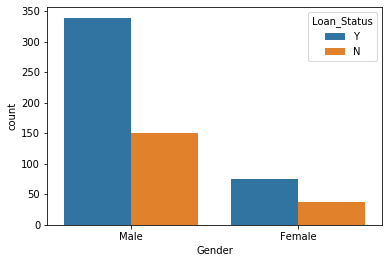

In [7]:
sns.countplot('Gender', hue = 'Loan_Status', data= data)

The countplot makes it evident that there is no discrimination in Loan approval based on Gender.

### Married

In [8]:
# checking the no. of people married
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

A majority of people applying for loan are married

In [9]:
data.groupby(['Married']).Gender.value_counts()

Married  Gender
No       Male      130
         Female     80
Yes      Male      357
         Female     31
Name: Gender, dtype: int64

This is a very interesting find that out people applying for loan the proportion of unmarried females are way more than married females.
This is also evident in our social construct, as married men are more liable towards their spouse.

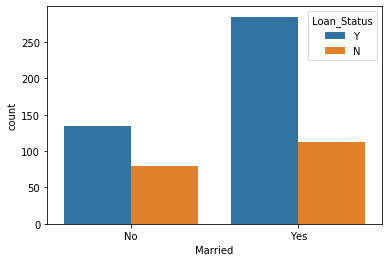

In [10]:
sns.countplot('Married', hue = 'Loan_Status', data =data)

As evident from the countplot Married people are more given Loans more frequently than Unmarried people

### Dependents

In [11]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

More people are applying for loans with 0 dependents.
People with more than 3 dependents applying for loan are relatively very low.

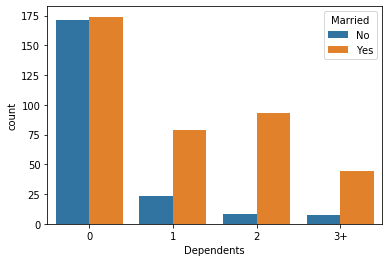

In [12]:
sns.countplot('Dependents', hue = 'Married', data = data)

So the applicant will be having higher probability of having a dependent when he is married. his would refer to having a child after marriage, so the child would be the dependent in this case.

### Education

In [13]:
data.groupby(['Education']).Loan_Status.value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

Graduates have a high chance of loan approval than non-graduates.

### Self Employed

In [14]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
data.groupby(['Self_Employed']).Loan_Status.value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

Self employed people are also given loans in proportion to salaried employees. Also the people who are self employed have greater average salary than the people who are not self employed.

### ApplicantIncome and CoapplicantIncome

In [16]:
print("The Average Income of people applied for Loan is : ", round(data.ApplicantIncome.mean()))
print("The Max Income of people applied for Loan is : ", round(data.ApplicantIncome.max()))
print("The Min Income of people applied for Loan is : ", round(data.ApplicantIncome.min()))


The Average Income of people applied for Loan is :  5403
The Max Income of people applied for Loan is :  81000
The Min Income of people applied for Loan is :  150


In [17]:
print("The Average Income of Coapplicant applied for Loan is : ", round(data.CoapplicantIncome.mean()))
print("The Max Income of Coapplicant applied for Loan is : ", round(data.CoapplicantIncome.max()))
print("The Min Income of Coapplicant applied for Loan is : ", round(data.CoapplicantIncome.min()))

The Average Income of Coapplicant applied for Loan is :  1621
The Max Income of Coapplicant applied for Loan is :  41667
The Min Income of Coapplicant applied for Loan is :  0


There are lot of Coapplicants with zero income. So, the loan amount will vary accordingly combining the applicants and coapplicants income.

let's add ApplicantsIncome and CoapplicantsIncome to make TotalIncome and continue with the analysis.

In [18]:
data['TotalIncome'] = data.ApplicantIncome + data.CoapplicantIncome

In [19]:
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis =1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


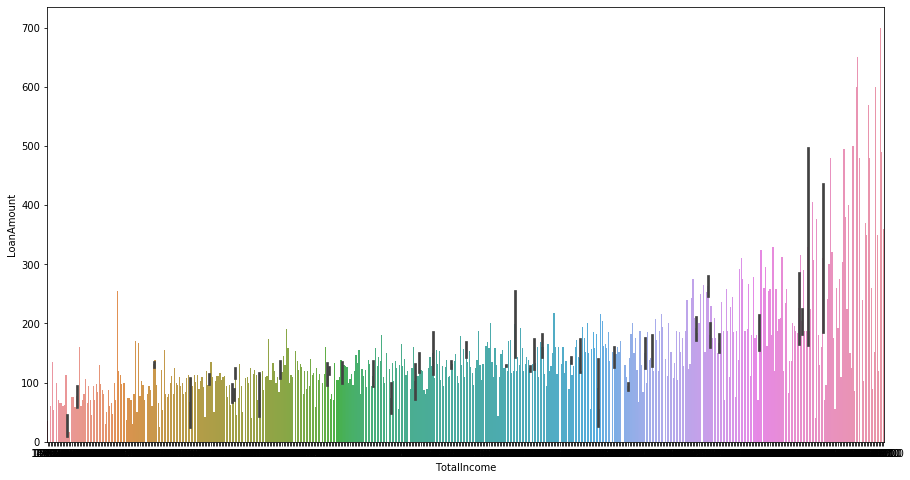

In [20]:
plt.figure(figsize =(15,8))
sns.barplot('TotalIncome', 'LoanAmount', data = data)

As evident from the barplot as the TotalIncome increases the loan demand also increases.

### Loan Amount

In [21]:
print("The average Loan Amount is : ", round(data.LoanAmount.mean()))
print("The maximum Loan Amount is : ", round(data.LoanAmount.max()))
print("The minimum Loan Amount is : ", round(data.LoanAmount.min()))

The average Loan Amount is :  146
The maximum Loan Amount is :  700
The minimum Loan Amount is :  9


### Credit History

In [22]:
data.groupby(['Credit_History']).Loan_Status.value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

This seems to be the most imp. feature in providing loans by banks. Most of the people with zero credit history are denied loans.

### Property Area

In [23]:
data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [24]:
data.groupby(['Property_Area']).Loan_Status.value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

#Properties in Semi-Urban are more likely to get Loans than the properties in other two areas.

# Feature Engineering

### Gender

There are 13 missing values in Gender column. As, evident from our analysis the number of male applicants are approimately 4.5 times more than females..

let's fill all the missing values as males..

In [25]:
# replces the NaN with Male
data.Gender.fillna('Male', inplace = True)

In [26]:
data.Gender.isnull().sum()

0

In [27]:
# Replacing male and female with 0 and 1 to fit in the model
data.Gender.replace(['Male','Female'], [0,1], inplace = True)

### Married

There are 3 missing values in the Married column.. We can either replace it with married as more number of applicants are married or simply drop the rows as very minute amount of data is lost..

In [28]:
#updating the Nan values to Married
data.Married.fillna('Yes', inplace = True)

In [29]:
data.Married.isnull().any()

False

In [30]:
# replacing yes and no with 1 and 0
data.Married.replace(['Yes', 'No'], [1,0], inplace = True)

In [31]:
data.Married.value_counts()

1    401
0    213
Name: Married, dtype: int64

### Dependents

There are 15 null Values in dependent column.

We know that if a person is married, He/She has a higher probability of having dependents as per our analysis. so let's replace dependents as 1 if the person is married or 0 if person is unmarried.

In [32]:
data.Dependents.fillna(data.Married, inplace = True)

In [33]:
data.Dependents.isnull().any()

False

In [34]:
data.Dependents.replace(['0','1','2','3+'],[0,1,2,3], inplace = True)

### Education

Education column has no missing values.

In [35]:
# replacing values
data.Education.replace(['Graduate', 'Not Graduate'], [1,0], inplace = True)

In [36]:
data.Education.value_counts()

1    480
0    134
Name: Education, dtype: int64

### Self Employed

Self Employed column has 32 missing values. We know the avg salaries of self employed and salaried persons, so we will fill accrodingly.

In [37]:
avg_income0 = data.loc[data.Self_Employed == 'No'].TotalIncome.mean()
avg_income0

6630.737839977281

In [38]:
avg_income1 = data.loc[data.Self_Employed == 'Yes'].TotalIncome.mean()
avg_income1

8882.158536585366

In [39]:
#replacing null values with the help of avg total income of self_employed person and salaried person.
for row in range(data.shape[0]):
    if pd.isnull(data.loc[row, 'Self_Employed']):
        if data.loc[row, 'TotalIncome'] <= (avg_income0 + avg_income1)/2:
            data.loc[row, 'Self_Employed'] = 'No'
        elif data.loc[row, 'TotalIncome'] > (avg_income0 + avg_income1)/2:
            data.loc[row, 'Self_Employed'] = 'Yes'
    else:
        pass

In [40]:
data.Self_Employed.isnull().sum()

0

In [41]:
# replacing with 1 for Yes and 0 for No
data.Self_Employed.replace(['Yes', 'No'], [1,0], inplace = True)

In [42]:
data.Self_Employed.value_counts()

0    529
1     85
Name: Self_Employed, dtype: int64

### Loan Amount

In [43]:
urban_loan = data.loc[data.Property_Area == 'Urban'].LoanAmount.mean()
semiurban_loan = data.loc[data.Property_Area == 'Semiurban'].LoanAmount.mean()
rural_loan = data.loc[data.Property_Area == 'Rural'].LoanAmount.mean()
print(urban_loan, semiurban_loan, rural_loan)

142.19895287958116 145.50438596491227 152.2601156069364


Depending upon the property area we will replace the loan amount.

In [44]:
for row in range(data.shape[0]):
    if pd.isnull(data.loc[row, 'LoanAmount']):
        if data.loc[row, 'Property_Area'] == 'Urban':
            data.loc[row, 'LoanAmount'] = urban_loan
        elif data.loc[row, 'Property_Area'] == 'Semiurban':
            data.loc[row, 'LoanAmount'] = semiurban_loan
        elif data.loc[row, 'Property_Area'] == 'Rural':
            data.loc[row, 'LoanAmount'] = rural_loan
    else:
        pass

In [45]:
data.LoanAmount.isnull().sum()

0

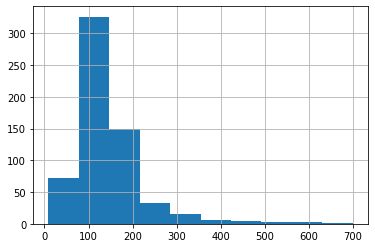

In [46]:
data.LoanAmount.hist()

Problem With LoanAmount Feature: LoanAmount is a continous feature, there is a problem with Continous Variables in Machine Learning Models.
    We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning.
There are very less data points above 400, so we will bin all the values above 400 into one bin and rest into bins of 100.

In [47]:
data.LoanAmount_group = 0

In [48]:
data.loc[data.LoanAmount <= 100, 'LoanAmount_group'] = 0
data.loc[(data.LoanAmount > 100) & (data.LoanAmount <= 200), 'LoanAmount_group'] = 1
data.loc[(data.LoanAmount > 200) & (data.LoanAmount <= 300), 'LoanAmount_group'] = 2
data.loc[(data.LoanAmount > 300) & (data.LoanAmount <= 400), 'LoanAmount_group'] = 3
data.loc[(data.LoanAmount > 400), 'LoanAmount_group'] = 4

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_group
0,LP001002,0,0,0,1,0,5849,0.0,142.198953,360.0,1.0,Urban,Y,5849.0,1.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,1.0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,0.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,1.0
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,1.0


### Loan_Amount_term

In [50]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

More than 85% loan term is 360 so we will replace all the null values with 360.0

In [51]:
data.Loan_Amount_Term.fillna(360.0, inplace = True)

In [52]:
data.Loan_Amount_Term.isnull().sum()

0

We can also bin this data into catrgories rather than numbers.

In [53]:
data.Loan_Term = 0

In [54]:
data.loc[data.Loan_Amount_Term == 12.0, 'Loan_Term'] = 0
data.loc[data.Loan_Amount_Term == 36.0, 'Loan_Term'] = 1
data.loc[data.Loan_Amount_Term == 60.0, 'Loan_Term'] = 2
data.loc[data.Loan_Amount_Term == 84.0, 'Loan_Term'] = 3
data.loc[data.Loan_Amount_Term == 120.0, 'Loan_Term'] = 4
data.loc[data.Loan_Amount_Term == 180.0, 'Loan_Term'] = 5
data.loc[data.Loan_Amount_Term == 240.0, 'Loan_Term'] = 6
data.loc[data.Loan_Amount_Term == 300.0, 'Loan_Term'] = 7
data.loc[data.Loan_Amount_Term == 360.0, 'Loan_Term'] = 8
data.loc[data.Loan_Amount_Term == 480.0, 'Loan_Term'] = 9

In [55]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_group,Loan_Term
0,LP001002,0,0,0,1,0,5849,0.0,142.198953,360.0,1.0,Urban,Y,5849.0,1.0,8.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,1.0,8.0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,0.0,8.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,1.0,8.0
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,1.0,8.0


### Credit Hisotry

There are 50 missing values in the credit history.
Credit Hisotry seems to be a very imp feature in loan approvals so we will repalce the credit history as 1 if loan is approved and 0 if loan is not approved.

In [56]:
for row in range(data.shape[0]):
    if pd.isnull(data.loc[row, 'Credit_History']):
        if data.loc[row, 'Loan_Status'] == 'Y':
            data.loc[row, 'Credit_History'] = 1
        elif data.loc[row, 'Loan_Status'] == 'N':
            data.loc[row, 'Credit_History'] = 0
    else:
        pass

In [57]:
data.Credit_History.isnull().sum()

0

### Property Area

Since this feauture has no missing values, Replacing Urban, Semiurban and Rural with 0,1,2

In [58]:
data.Property_Area.replace(['Urban', 'Semiurban', 'Rural'], [0,1,2], inplace = True)

In [59]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_group,Loan_Term
0,LP001002,0,0,0,1,0,5849,0.0,142.198953,360.0,1.0,0,Y,5849.0,1.0,8.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,N,6091.0,1.0,8.0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,Y,3000.0,0.0,8.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,Y,4941.0,1.0,8.0
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,Y,6000.0,1.0,8.0


### Loan_Status

This feature also has no missing values. So we just need to replace Y and N with 1 and 0.

In [60]:
data.Loan_Status.replace(['Y', 'N'], [1,0], inplace = True)

### Total Income

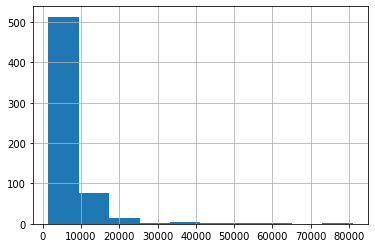

In [62]:
data.TotalIncome.hist()

As we can see there are very few people with TotalIncome greater than 20000 so we will bin all the values in one bin.

In [64]:
Income_final = 0

In [65]:
data.loc[data.TotalIncome <= 10000, 'Income_final'] = 0
data.loc[(data.TotalIncome > 10000) & (data.TotalIncome <= 20000) , 'Income_final'] = 1
data.loc[data.TotalIncome > 20000, 'Income_final'] = 2

In [66]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_group,Loan_Term,Income_final
0,LP001002,0,0,0,1,0,5849,0.0,142.198953,360.0,1.0,0,1,5849.0,1.0,8.0,0.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0,6091.0,1.0,8.0,0.0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1,3000.0,0.0,8.0,0.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1,4941.0,1.0,8.0,0.0
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1,6000.0,1.0,8.0,0.0


Now, our Exploratory data analysis and feature engineering part is completed.

# Feature Selection

In [72]:
# firstly, deleting the extra rows
data.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome'], axis = 1, inplace = True)

In [74]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_group,Loan_Term,Income_final
0,0,0,0,1,0,1.0,0,1,1.0,8.0,0.0
1,0,1,1,1,0,1.0,2,0,1.0,8.0,0.0
2,0,1,0,1,1,1.0,0,1,0.0,8.0,0.0
3,0,1,0,0,0,1.0,0,1,1.0,8.0,0.0
4,0,0,0,1,0,1.0,0,1,1.0,8.0,0.0


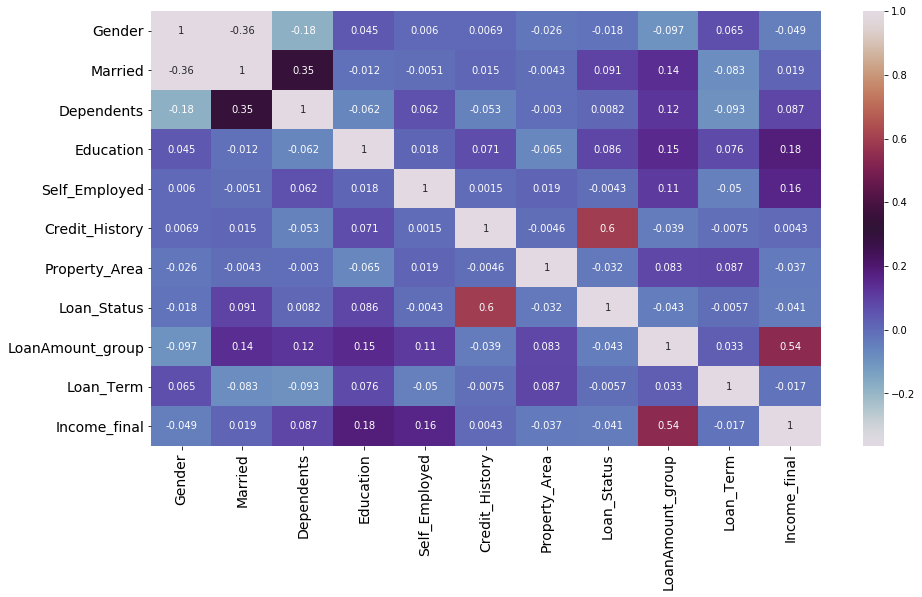

In [80]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = 'twilight')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [82]:
X = data.drop('Loan_Status', axis = 1)

In [84]:
y = data['Loan_Status']

# Model Building

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 20)

## KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    predict_1 = classifier.predict(X_test)
    accu = accuracy_score(predict_1, y_test)
    print(accu)

0.6810810810810811
0.6324324324324324
0.7567567567567568
0.772972972972973
0.7405405405405405
0.7891891891891892
0.7783783783783784
0.7837837837837838
0.7135135135135136


In [123]:
print("the max accuracy is : 0.7891 at n_neighbor = 6")

the max accuracy is : 0.7891 at n_neighbor = 6


## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit( X_train , y_train)
predict_2 = model.predict(X_test)
print('Accuracy for Decision Tree is ', accuracy_score(predict_2, y_test))

Accuracy for Decision Tree is  0.745945945945946


## Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
model_1=RandomForestClassifier(n_estimators=100)
model_1.fit(X_train,y_train)
predict_3=model.predict(X_test)
print('The accuracy of the Random Forests is',accuracy_score(predict_3,y_test))

The accuracy of the Random Forests is 0.745945945945946
